# CAPSTONE PROJECT - PREDICTING HOSPITAL READMISSION RATES

## Problem statement

The objective is to develop a predictive model that can accurately determine the likelihood of hospital readmission for patients within a specific period following their discharge. By employing classification algorithms—such as Logistic Regression, Decision Trees, Support Vector Machines (SVM), and K-Nearest Neighbors (KNN)—the model will be trained on a labeled dataset. The labels in this dataset categorically indicate whether each patient experienced a readmission post-discharge. This model aims to assist healthcare providers in identifying at-risk patients, thereby enabling timely and targeted interventions to reduce readmission rates.

## Expected results: 

The target variable classifies patients into one of two categories:

- Readmitted: The patient will be readmitted to the hospital within the specified period.
- Not Readmitted: The patient will not be readmitted within the specified period.

## Expected techniques:

- Data Preprocessing: Handle missing values, encode categorical variables, and normalize/scale numerical features.
- Feature Engineering: Create meaningful features from raw data, such as the number of previous admissions, time since last admission, specific lab results, etc.
- Model Training: Use classification algorithms logistic regression, decision trees, SVM, or KNN to train a model on the labeled dataset where the label indicates whether the patient was readmitted.
- Prediction: Apply the trained model to test patient data to mimic future patient data to predict whether they are likely to be readmitted. ​
- Model Evaluation: Evaluate the model using appropriate metrics such as accuracy, precision, and recall.

## Why this question is important?

Patient readmission rates are an important indicator used by doctors and hospital administrators to assess the quality of care.  
Gaining better insight and prediction of readmission can be used at time of treatment to make better decisions whether a patient is ready to be released from the hospital and help the medical care providers improve the patient’s treatment plan during their stay.





In [371]:
# Standard libraries
import time
import warnings

# Data manipulation and mathematical libraries
import numpy as np
import pandas as pd

# Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
# plt.style.use('ggplot')  # Setting the style for all plots
plt.style.use("fivethirtyeight") # styling your charts 

# Machine Learning: Preprocessing
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, OneHotEncoder

# Machine Learning: Models
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Lasso, Ridge, LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Machine Learning: Model Selection and Validation
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split

# Machine Learning: Metrics
from sklearn import metrics
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix, 
                             mean_squared_error, precision_score, recall_score)

# Suppressing warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")

print("All modules loaded")



All modules loaded


In [373]:
df = pd.read_csv('data/Patient_informationread_readmit.csv')

In [375]:
df.head()

,LOG_ID,MRN,DISCH_DISP,HOSP_ADMSN_TIME,HOSP_DISCH_TIME,LOS,ICU_ADMIN_FLAG,READMIT,SURGERY_DATE,AGE,...,SEX,PRIMARY_ANES_TYPE_NM,ASA_RATING_C,PATIENT_CLASS_GROUP,PATIENT_CLASS_NM,PRIMARY_PROCEDURE_NM,IN_OR_DTTM,OUT_OR_DTTM,AN_START_DATETIME,AN_STOP_DATETIME
0,bd16a67880da1e77,0000c7ccaa009343,Home Routine,24-Feb-19,24-Feb-19,0.0,No,1,24-Feb-19,39,...,Female,General,40,Inpatient,Hospital Inpatient Surgery,"CYSTOSCOPY, + URETEROSCOPY, RETROGRADE PYELOGR...",2/24/2019 8:58,2/24/2019 10:02,2/24/2019 8:59,2/24/2019 10:12
1,47fbfb9938d6067b,0000c7ccaa009343,Home Routine,31-Mar-19,1-Apr-19,1.0,No,0,31-Mar-19,39,...,Female,General,40,Outpatient,Hospital Outpatient Surgery,"CYSTOSCOPY, + URETEROSCOPY, RETROGRADE PYELOGR...",3/31/2019 16:01,3/31/2019 18:54,3/31/2019 16:02,3/31/2019 19:06
2,c6d3fc04767a6e36,0000e45237d1fc96,Home Routine,12-Feb-21,13-Feb-21,1.0,Yes,0,12-Feb-21,52,...,Male,General,0,Inpatient,Inpatient Admission,"IRRIGATION AND DEBRIDEMENT, KNEE",NaN,NaN,NaN,NaN
3,611e9c50425dbf55,0000e45237d1fc96,Home Routine,12-Feb-21,13-Feb-21,1.0,Yes,0,13-Feb-21,52,...,Male,General,60,Inpatient,Inpatient Admission,"IRRIGATION AND DEBRIDEMENT, KNEE",2/13/2021 7:11,2/13/2021 9:03,2/13/2021 7:11,2/13/2021 9:06
4,be9a505e236e5b67,000181ce0ebf1e12,Home Routine,6-Jul-23,7-Jul-23,1.0,No,0,6-Jul-23,31,...,Male,General,40,Inpatient,Hospital Inpatient Surgery,"THYROIDECTOMY, TOTAL",7/6/2023 10:13,7/6/2023 15:45,7/6/2023 10:13,7/6/2023 16:20


In [377]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65728 entries, 0 to 65727
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   LOG_ID                65728 non-null  object 
 1   MRN                   65728 non-null  object 
 2   DISCH_DISP            65721 non-null  object 
 3   HOSP_ADMSN_TIME       65728 non-null  object 
 4   HOSP_DISCH_TIME       65714 non-null  object 
 5   LOS                   65714 non-null  float64
 6   ICU_ADMIN_FLAG        65728 non-null  object 
 7   READMIT               65728 non-null  int64  
 8   SURGERY_DATE          65728 non-null  object 
 9   AGE                   65728 non-null  int64  
 10  HEIGHT                52695 non-null  object 
 11  WEIGHT                63319 non-null  float64
 12  SEX                   65728 non-null  object 
 13  PRIMARY_ANES_TYPE_NM  65168 non-null  object 
 14  ASA_RATING_C          65728 non-null  int64  
 15  PATIENT_CLASS_GROUP

### Understanding the Features


Examine the data descriptions and features





#### Input variables:
#### Patient Record Data and Definitions:

| Column Name           | Description                                                                                          |
|-----------------------|------------------------------------------------------------------------------------------------------|
| LOG_ID                | Hospital visit or encounter unique ID                                                                |
| MRN                   | Medical Record Number or Patient ID                                                                  |
| DISCH_DISP            | Discharge Disposition or Description                                                                 |
| HOSP_ADMSN_TIME       | Hospital Admission Time                                                                              |
| HOSP_DISCH_TIME       | Hospital Discharge Time                                                                              |
| LOS                   | Length of Stay                                                                                       |
| ICU_ADMIN_FLAG        | Admitted to ICU flag (true/false)                                                                    |
| READMIT               | Patient has been readmitted                                                                          |
| SURGERY_DATE          | Surgery Date                                                                                         |
| AGE                   | Patient Age                                                                                          |
| HEIGHT                | Height                                                                                               |
| WEIGHT                | Weight                                                                                               |
| SEX                   | Sex                                                                                                  |
| PRIMARY_ANES_TYPE_NM  | Primary anesthesia type                                                                               |
| ASA_RATING_C          | American Society of Anesthesiologists (ASA) Code - physical status of patients before surgery        |
| PATIENT_CLASS_GROUP   | Patient Class Group                                                                                  |
| PATIENT_CLASS_NM      | Patient Class Name: inpatient, outpatient                                                            |
| PRIMARY_PROCEDURE_NM  | Primary Procedure Name                                                                               |
| IN_OR_DTTM            | In Operating Room DateTime                                                                           |
| OUT_OR_DTTM           | Out of Operating Room DateTime                                                                       |
| AN_START_DATETIME     | Anesthesia Start DateTime                                                                            |
| AN_STOP_DATETIME      | Anesthesia Stop DateTime                                                                             |


In [381]:
#### Remove Duplicate Rows for the same Patient MRN, then verify.

In [383]:
df = df.drop_duplicates(subset='MRN', keep='first')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39683 entries, 0 to 65727
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   LOG_ID                39683 non-null  object 
 1   MRN                   39683 non-null  object 
 2   DISCH_DISP            39681 non-null  object 
 3   HOSP_ADMSN_TIME       39683 non-null  object 
 4   HOSP_DISCH_TIME       39681 non-null  object 
 5   LOS                   39681 non-null  float64
 6   ICU_ADMIN_FLAG        39683 non-null  object 
 7   READMIT               39683 non-null  int64  
 8   SURGERY_DATE          39683 non-null  object 
 9   AGE                   39683 non-null  int64  
 10  HEIGHT                30887 non-null  object 
 11  WEIGHT                38247 non-null  float64
 12  SEX                   39683 non-null  object 
 13  PRIMARY_ANES_TYPE_NM  39521 non-null  object 
 14  ASA_RATING_C          39683 non-null  int64  
 15  PATIENT_CLASS_GROUP   39

### FEATURE DESCRIPTION AND RELEVANCE

- HEIGHT and WEIGHT independantly may not be valuable patient data, but these features can be used to compute the BMI index of the patient which may better predict a health risk. The BMI formula is:

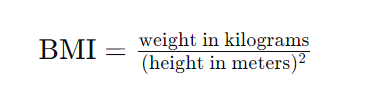

- Delete rows with missing WEIGHT or HEIGHT values before calculating BMI

In [387]:
# Drop rows with missing values in either "WEIGHT" or "HEIGHT" column

df = df.dropna(subset=['WEIGHT', 'HEIGHT'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30773 entries, 0 to 65727
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   LOG_ID                30773 non-null  object 
 1   MRN                   30773 non-null  object 
 2   DISCH_DISP            30772 non-null  object 
 3   HOSP_ADMSN_TIME       30773 non-null  object 
 4   HOSP_DISCH_TIME       30771 non-null  object 
 5   LOS                   30771 non-null  float64
 6   ICU_ADMIN_FLAG        30773 non-null  object 
 7   READMIT               30773 non-null  int64  
 8   SURGERY_DATE          30773 non-null  object 
 9   AGE                   30773 non-null  int64  
 10  HEIGHT                30773 non-null  object 
 11  WEIGHT                30773 non-null  float64
 12  SEX                   30773 non-null  object 
 13  PRIMARY_ANES_TYPE_NM  30656 non-null  object 
 14  ASA_RATING_C          30773 non-null  int64  
 15  PATIENT_CLASS_GROUP   30

In [389]:
# convert WEIGHT column from ounces to pounds 

df['WEIGHT'] = df['WEIGHT'] / 16


In [391]:
# Define a function to convert height from "feet'inches" to total inches
def convert_height(height):
    try:
        feet, inches = height.split("'")
        if inches:  # Check if inches part is not empty
            inches = inches.replace('"', '').strip()
        else:
            inches = '0'  # Default to 0 inches if no inches part is present
        total_inches = int(feet) * 12 + int(inches)
        return total_inches
    except ValueError:
        return None  # Return None if there is a format problem


In [393]:
# Ensure the HEIGHT column is treated as a string before applying the function
df['HEIGHT'] = df['HEIGHT'].astype(str).apply(convert_height)

# Calculate BMI and store it in a new column "BMI", ensuring no division by zero or None values
df['BMI'] = df.apply(lambda row: 703 * row['WEIGHT'] / (row['HEIGHT'] ** 2) if row['HEIGHT'] else None, axis=1)

# Display the DataFrame to see the result
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30773 entries, 0 to 65727
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   LOG_ID                30773 non-null  object 
 1   MRN                   30773 non-null  object 
 2   DISCH_DISP            30772 non-null  object 
 3   HOSP_ADMSN_TIME       30773 non-null  object 
 4   HOSP_DISCH_TIME       30771 non-null  object 
 5   LOS                   30771 non-null  float64
 6   ICU_ADMIN_FLAG        30773 non-null  object 
 7   READMIT               30773 non-null  int64  
 8   SURGERY_DATE          30773 non-null  object 
 9   AGE                   30773 non-null  int64  
 10  HEIGHT                29584 non-null  float64
 11  WEIGHT                30773 non-null  float64
 12  SEX                   30773 non-null  object 
 13  PRIMARY_ANES_TYPE_NM  30656 non-null  object 
 14  ASA_RATING_C          30773 non-null  int64  
 15  PATIENT_CLASS_GROUP   30

In [395]:
df = df.loc[~df['DISCH_DISP'].isin(['Expired', 'Coroner'])]

# Display the DataFrame to see the result
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30419 entries, 0 to 65727
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   LOG_ID                30419 non-null  object 
 1   MRN                   30419 non-null  object 
 2   DISCH_DISP            30418 non-null  object 
 3   HOSP_ADMSN_TIME       30419 non-null  object 
 4   HOSP_DISCH_TIME       30417 non-null  object 
 5   LOS                   30417 non-null  float64
 6   ICU_ADMIN_FLAG        30419 non-null  object 
 7   READMIT               30419 non-null  int64  
 8   SURGERY_DATE          30419 non-null  object 
 9   AGE                   30419 non-null  int64  
 10  HEIGHT                29244 non-null  float64
 11  WEIGHT                30419 non-null  float64
 12  SEX                   30419 non-null  object 
 13  PRIMARY_ANES_TYPE_NM  30306 non-null  object 
 14  ASA_RATING_C          30419 non-null  int64  
 15  PATIENT_CLASS_GROUP   30

## Exploratory Data Analysis (EDA) -Exploration:

⦁	remove spaces

⦁	make all lower case

⦁	remove or solve for missing value 

⦁	Remove redundant features that don't add value to the model or predicting the object

⦁		numerics and date conversion

⦁	cardinality for categorical data to see the counts of unique values, drop feature if too much cardinality

⦁	remove duplicates

⦁	convert to integer 


### FEATURE DESCRIPTION AND RELEVANCE (cont.)

- MRN and LOG_ID are ID numbers do not contribute to model prediction.
- HOSP_ADMSN_TIME, HOSP_DISCH_TIME, IN_OR_DTTM, OUT_OR_DTTM, AN_START_DATETIME, SURGERY_DATE, and AN_STOP_DATETIME provide admission, operating room and anastesia start and stop dates and times.  These start dates are often the same, giving little additional insight to predicting a readmission. - These should be removed.  
- WEIGHT and HEIGHT were used to generate BMI.  BMI has more relavance to evaluate patient health.


In [399]:
#removal of unnecessary features. 

# List of columns to drop
columns_to_drop = ['LOG_ID', 'HOSP_ADMSN_TIME', 'HOSP_DISCH_TIME','IN_OR_DTTM', 'PRIMARY_ANES_TYPE_NM', 'PRIMARY_PROCEDURE_NM','OUT_OR_DTTM', 'AN_START_DATETIME', 'PATIENT_CLASS_NM','SURGERY_DATE','AN_STOP_DATETIME', 'WEIGHT', 'HEIGHT']

# Drop the columns
df_new = df.drop(columns=columns_to_drop)


# Verify the new DataFrame
df_new.head(6)

,MRN,DISCH_DISP,LOS,ICU_ADMIN_FLAG,READMIT,AGE,SEX,ASA_RATING_C,PATIENT_CLASS_GROUP,BMI
0,0000c7ccaa009343,Home Routine,0.0,No,1,39,Female,40,Inpatient,26.542143
2,0000e45237d1fc96,Home Routine,1.0,Yes,0,52,Male,0,Inpatient,29.896485
5,00018b4d9acb258b,Skilled Nursing Facility,31.0,Yes,0,80,Male,0,Inpatient,27.990980
7,00048d479a5b6da4,Home Routine,11.0,No,0,59,Male,60,Inpatient,22.717382
10,000bcc6d2badd0c8,Home Routine,1.0,Yes,0,59,Male,80,Inpatient,34.713514
11,000db5bb4b440912,Home Healthcare IP Admit Related,7.0,Yes,0,77,Male,0,Outpatient,22.450489


In [401]:
# Indentify where the missing values are

df_new.isna().sum()

MRN                       0
DISCH_DISP                1
LOS                       2
ICU_ADMIN_FLAG            0
READMIT                   0
AGE                       0
SEX                       0
ASA_RATING_C              0
PATIENT_CLASS_GROUP       0
BMI                    1175
dtype: int64

In [403]:
#checking to see percentage NaN values represent

df_new.isna().mean()*100 

MRN                    0.000000
DISCH_DISP             0.003287
LOS                    0.006575
ICU_ADMIN_FLAG         0.000000
READMIT                0.000000
AGE                    0.000000
SEX                    0.000000
ASA_RATING_C           0.000000
PATIENT_CLASS_GROUP    0.000000
BMI                    3.862717
dtype: float64

#### Although there are some columns with NaN values, we can see above that they only make up 3.87%. 
#### There are sufficient rows of data to drop rows with NaN values

In [406]:
# Drop rows where any column has NaN values
df_new_clean = df_new.dropna()

# Verify again to confirm no NaN values remain
print(df_new_clean.isna().sum())


MRN                    0
DISCH_DISP             0
LOS                    0
ICU_ADMIN_FLAG         0
READMIT                0
AGE                    0
SEX                    0
ASA_RATING_C           0
PATIENT_CLASS_GROUP    0
BMI                    0
dtype: int64


In [408]:
df_new_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29242 entries, 0 to 65727
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MRN                  29242 non-null  object 
 1   DISCH_DISP           29242 non-null  object 
 2   LOS                  29242 non-null  float64
 3   ICU_ADMIN_FLAG       29242 non-null  object 
 4   READMIT              29242 non-null  int64  
 5   AGE                  29242 non-null  int64  
 6   SEX                  29242 non-null  object 
 7   ASA_RATING_C         29242 non-null  int64  
 8   PATIENT_CLASS_GROUP  29242 non-null  object 
 9   BMI                  29242 non-null  float64
dtypes: float64(2), int64(3), object(5)
memory usage: 2.5+ MB


In [410]:
## Change non-numeric Features to Integers

df_new_clean['BMI'] = df_new_clean['BMI'].astype(int)

df_new_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29242 entries, 0 to 65727
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MRN                  29242 non-null  object 
 1   DISCH_DISP           29242 non-null  object 
 2   LOS                  29242 non-null  float64
 3   ICU_ADMIN_FLAG       29242 non-null  object 
 4   READMIT              29242 non-null  int64  
 5   AGE                  29242 non-null  int64  
 6   SEX                  29242 non-null  object 
 7   ASA_RATING_C         29242 non-null  int64  
 8   PATIENT_CLASS_GROUP  29242 non-null  object 
 9   BMI                  29242 non-null  int32  
dtypes: float64(1), int32(1), int64(3), object(5)
memory usage: 2.3+ MB


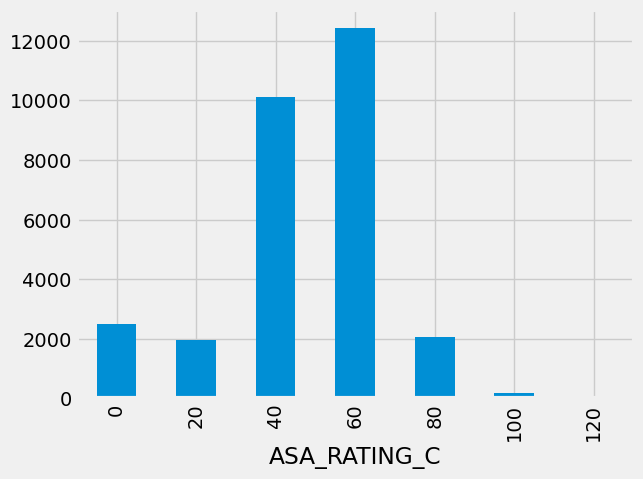

In [412]:
df_new_clean.groupby('ASA_RATING_C')['READMIT'].count().plot(kind = 'bar');

#### ASA Rating Codes explained: 
- 20 = A normal healthy patient 
- 40 = A patient with mild systemic disease. This could be a well-controlled condition that does not limit activity 
- 60 = A patient with severe systemic disease that limits activity but is not incapacitating 
- 80 = A patient with severe systemic disease that is a constant threat to life 
- 100 = A moribund patient who is not expected to survive without the operation 
- 120 = A declared brain-dead patient whose organs are being removed for donor purposes

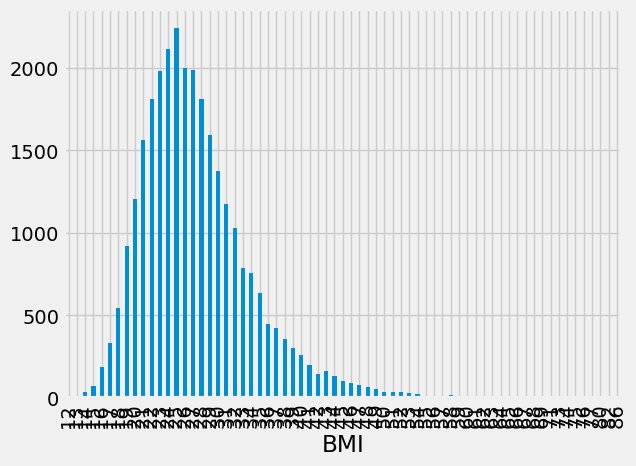

In [618]:
df_new_clean.groupby('BMI')['READMIT'].count().plot(kind = 'bar');

In [614]:
df = df_new_clean

In [416]:
#Check for cardinality and outlyers that don't make sense.  

for column in df.columns:
    print(f"Column: {column}")
    print(df[column].value_counts())
    print("\n")
    
    

Column: MRN
MRN
0000c7ccaa009343    1
aa578f400743b01c    1
aa54de321b376c3a    1
aa541c674b5660e2    1
aa536c66167da222    1
                   ..
5501fa2e110bb713    1
54fe2476d2bf4248    1
54f2f7145c837fb0    1
54f26948e08bc9ed    1
fffdbbf506ab0725    1
Name: count, Length: 29242, dtype: int64


Column: DISCH_DISP
DISCH_DISP
Home Routine                                       21938
Home Healthcare IP Admit Related                    2970
Skilled Nursing Facility                            1855
Acute Care Facility (not this hospital)              509
Rehab Facility (this hospital)                       490
Rehab Facility (not this hospital)                   326
Hospice Facility                                     192
Long Term Care Facility                              179
Against Medical Advice                               169
Recuperative Care                                     75
Psychiatric Facility (this hospital)                  73
Sub-Acute Care Facility                   

In [418]:
#Since DISCH_DISP is a non-numeric feature that One-Hot Encoding will later be applied to, I will reduce this column by removing redundant values with < 100 responses.   
#Less than 2.1% of rows will be removed

# Targeting only the 'DISCH_DISP' column
column = 'DISCH_DISP'

# Get the value counts for the 'DISCH_DISP' column
value_counts = df[column].value_counts()

# Identify values that have less than 100 counts
to_remove = value_counts[value_counts < 100].index

# Filtering out rows where the 'DISCH_DISP' value is in the list to remove
df = df[~df[column].isin(to_remove)]

# The DataFrame `df` now has rows removed where 'DISCH_DISP' has less than 100 counts.



In [420]:
# No strong cordinality.
# Will remove patients which are deceased

df = df.loc[~df['DISCH_DISP'].isin(['Expired', 'Coroner'])]

# Display the DataFrame to see the result
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28628 entries, 0 to 65727
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MRN                  28628 non-null  object 
 1   DISCH_DISP           28628 non-null  object 
 2   LOS                  28628 non-null  float64
 3   ICU_ADMIN_FLAG       28628 non-null  object 
 4   READMIT              28628 non-null  int64  
 5   AGE                  28628 non-null  int64  
 6   SEX                  28628 non-null  object 
 7   ASA_RATING_C         28628 non-null  int64  
 8   PATIENT_CLASS_GROUP  28628 non-null  object 
 9   BMI                  28628 non-null  int32  
dtypes: float64(1), int32(1), int64(3), object(5)
memory usage: 2.3+ MB


In [422]:
# Using Describe to identify outlyers and confirm that the data makes sense

df.describe()

,LOS,READMIT,AGE,ASA_RATING_C,BMI
count,28628.000000,28628.000000,28628.000000,28628.000000,28628.000000
mean,4.610836,0.155896,54.074228,46.780774,27.418926
std,8.314867,0.362763,17.968414,20.424561,6.706865
min,0.000000,0.000000,17.000000,0.000000,12.000000
25%,0.000000,0.000000,39.000000,40.000000,23.000000
50%,2.000000,0.000000,56.000000,40.000000,26.000000
75%,5.000000,0.000000,68.000000,60.000000,31.000000
max,140.000000,1.000000,90.000000,120.000000,86.000000


In [424]:
#Remove Duplicates

sum(df.duplicated())

0

In [426]:
sum_of_duplicates = sum(df.duplicated())
print(f"Number of duplicate rows: {sum_of_duplicates}")

Number of duplicate rows: 0


In [428]:
df_nodup = df.drop_duplicates()

sum_of_duplicates = sum(df_nodup.duplicated())
print(f"Number of duplicate rows: {sum_of_duplicates}")

Number of duplicate rows: 0


In [430]:
df = df_nodup

In [432]:
sum(df.duplicated())

0

In [436]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28628 entries, 0 to 65727
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MRN                  28628 non-null  object 
 1   DISCH_DISP           28628 non-null  object 
 2   LOS                  28628 non-null  float64
 3   ICU_ADMIN_FLAG       28628 non-null  object 
 4   READMIT              28628 non-null  int64  
 5   AGE                  28628 non-null  int64  
 6   SEX                  28628 non-null  object 
 7   ASA_RATING_C         28628 non-null  int64  
 8   PATIENT_CLASS_GROUP  28628 non-null  object 
 9   BMI                  28628 non-null  int32  
dtypes: float64(1), int32(1), int64(3), object(5)
memory usage: 2.3+ MB


In [438]:
# List of columns to drop
columns_to_drop = ['MRN']

df_new = df.drop(columns=columns_to_drop)

# Verify the new DataFrame
df_new.head(3)

,DISCH_DISP,LOS,ICU_ADMIN_FLAG,READMIT,AGE,SEX,ASA_RATING_C,PATIENT_CLASS_GROUP,BMI
0,Home Routine,0.0,No,1,39,Female,40,Inpatient,26
2,Home Routine,1.0,Yes,0,52,Male,0,Inpatient,29
5,Skilled Nursing Facility,31.0,Yes,0,80,Male,0,Inpatient,27


In [440]:
df=df_new

In [442]:
df['READMIT'].value_counts()

READMIT
0    24165
1     4463
Name: count, dtype: int64

In [444]:
df.READMIT.value_counts(normalize=True).round(3)

READMIT
0    0.844
1    0.156
Name: proportion, dtype: float64

#### The dataset is unbalanced, as only 4441 (15.4%) records are related with readmissions. 

### Imbalanced Features

In a healthcare dataset, we should expect patient readmission data might be highly imbalanced, meaning that only a small percentage of patients are readmitted compared to those who are not. The goal for any hospital is to have low readmisstion rates. 


In [447]:
df.shape

(28628, 9)

Text(0.5, 0.98, 'Histograms Showing Distribution and Skew of the Features')

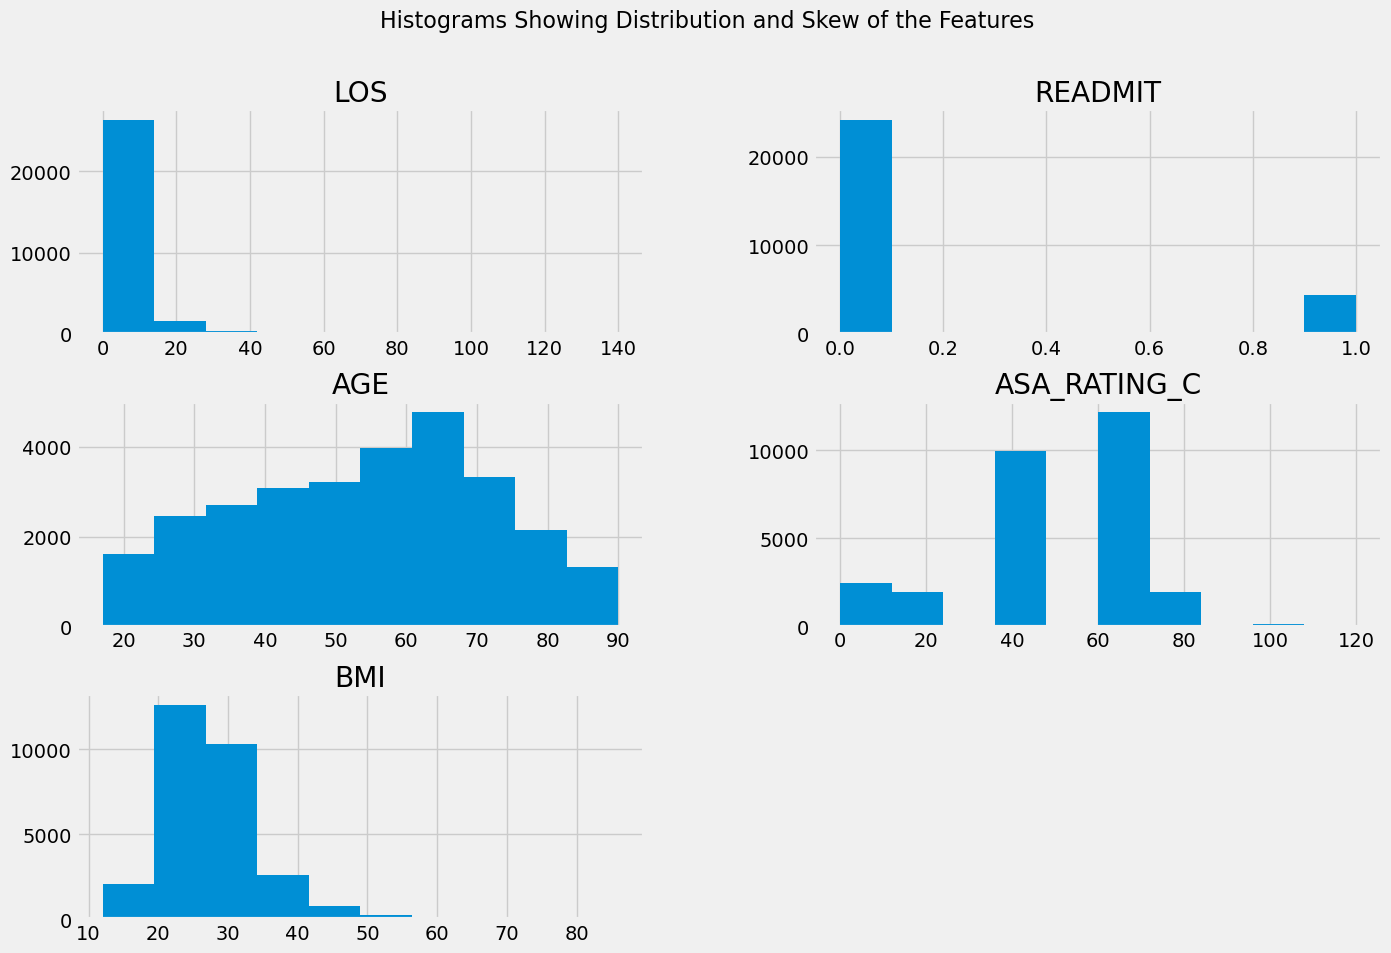

In [449]:
# plt.figure()
df.hist(figsize = (15,10));
plt.suptitle("Histograms Showing Distribution and Skew of the Features", fontsize=16)

#OR

#plt.style.use('default') # overrides the fiverthirthy eight
#df.hist(figsize = (15, 15), grid=False);

#right scue mean is greater that median


### BMI Rating and Targets for Men and Women: 
- Underweight: BMI less than 18.5
- Normal weight: BMI 18.5 to 24.9
- Overweight: BMI 25.0 to 29.9
- Obesity: BMI 30.0 and above

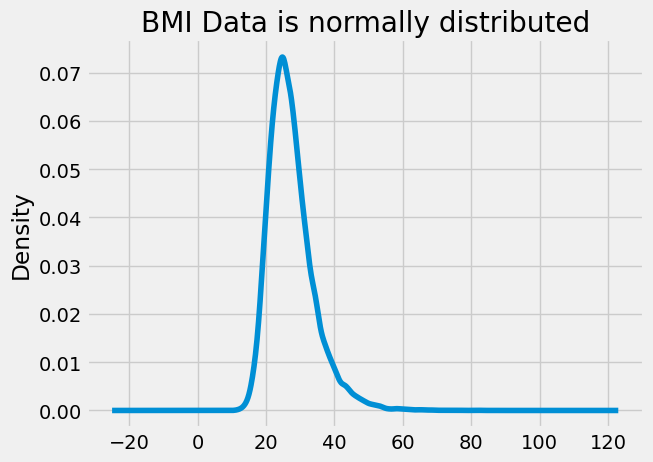

In [456]:
df['BMI'].plot(kind = 'kde', title = "BMI Data is normally distributed");

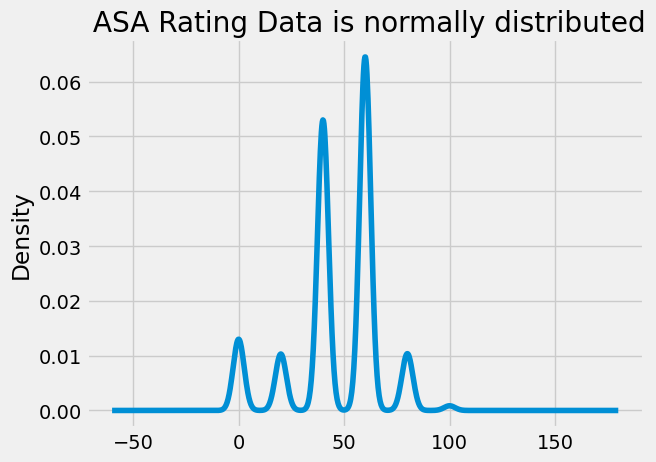

In [458]:
df['ASA_RATING_C'].plot(kind = 'kde', title = " ASA Rating Data is normally distributed");


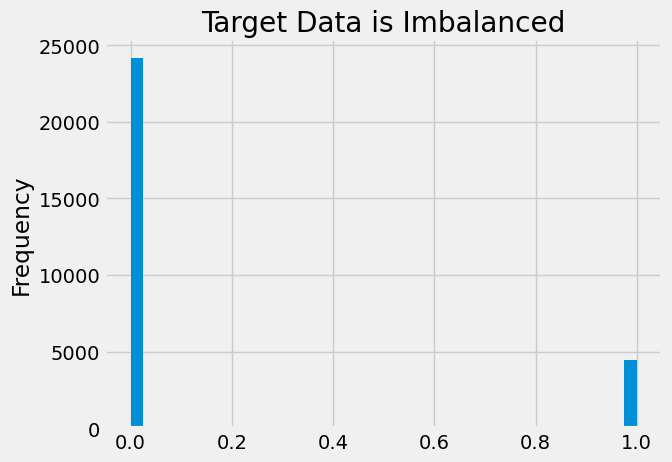

In [87]:
df['READMIT'].plot(kind = 'hist', bins = 40, title = "Target Data is Imbalanced");



### Correlation

### Pairplot shows degree of Correlation - no strong or skewed correlation

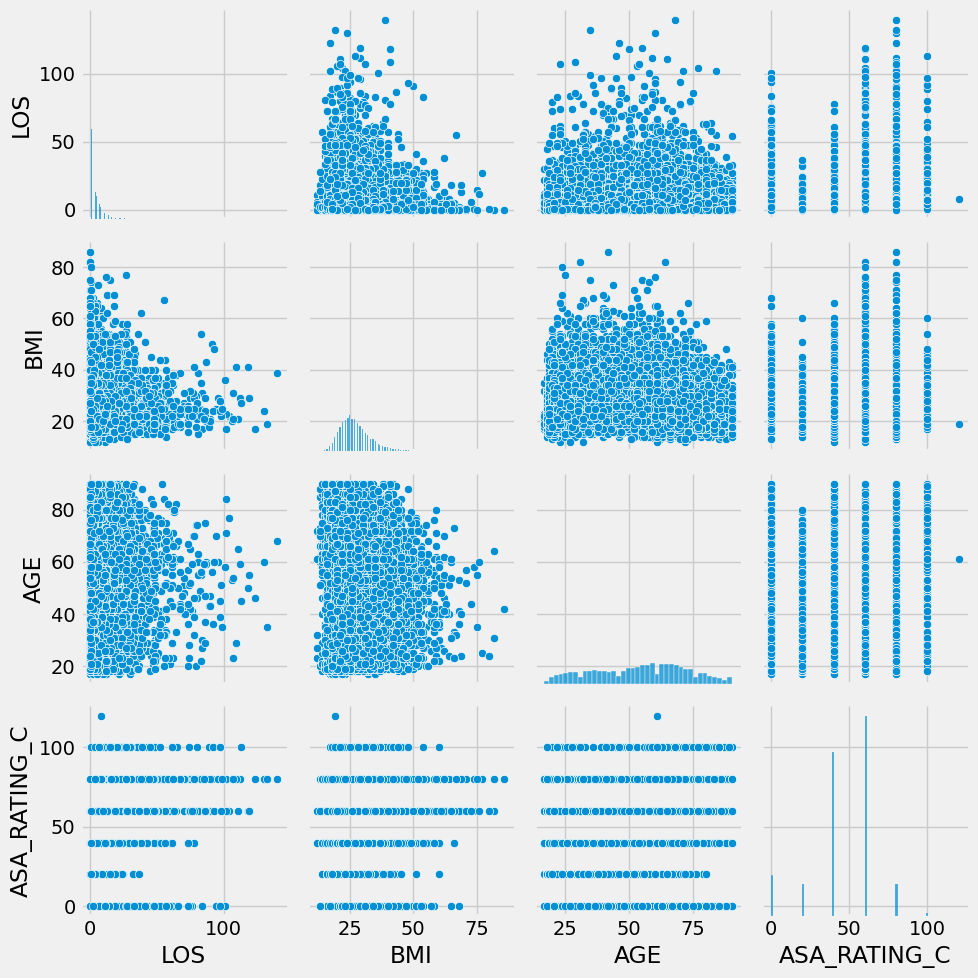

In [463]:
# Pairplot
sns.pairplot(df[['LOS', 'BMI', 'AGE', 'ASA_RATING_C']])
plt.tight_layout()
plt.show()

<Figure size 1000x800 with 0 Axes>

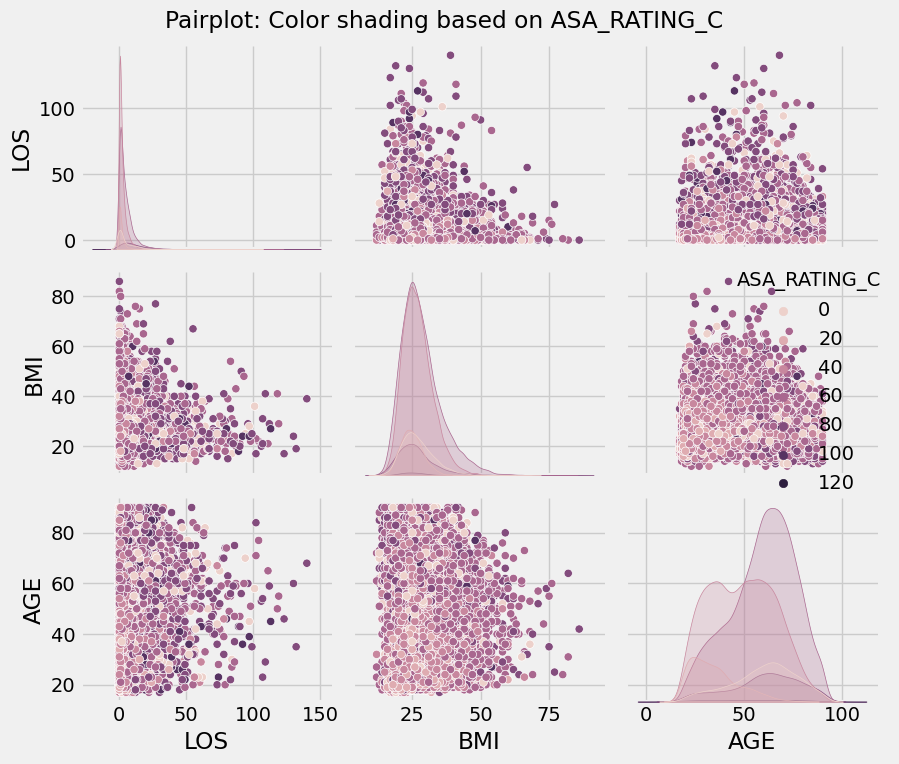

In [95]:
# Pairplot with different colors based on 'ASA_RATING_C'

plt.figure(figsize=(10, 8))
sns.pairplot(df[['LOS', 'BMI', 'AGE', 'ASA_RATING_C']], hue='ASA_RATING_C')
plt.tight_layout()
plt.suptitle('Pairplot: Color shading based on ASA_RATING_C', y=1.02)  
plt.show()

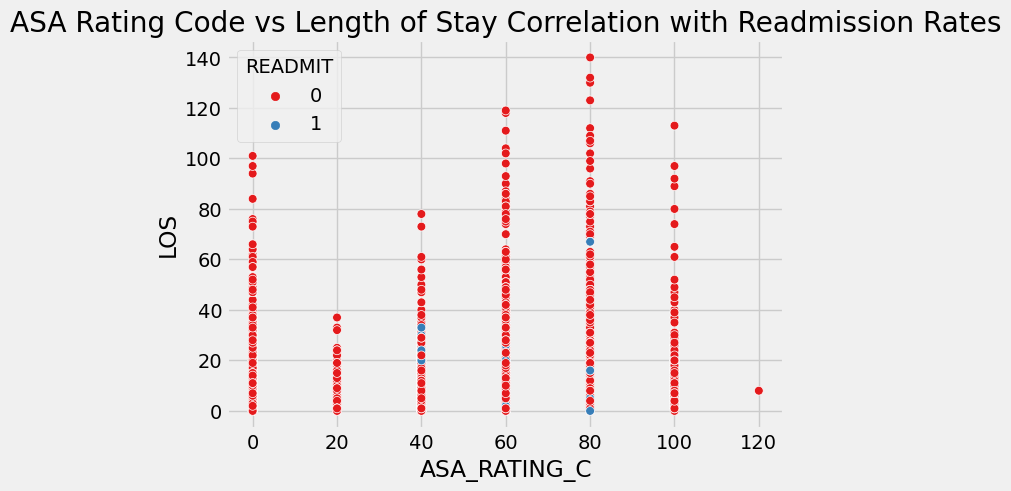

In [469]:
plt.xlabel("ASA_RATING_C")
plt.ylabel("LOS")
plt.title("ASA Rating Code vs Length of Stay Correlation with Readmission Rates")

sns.scatterplot(x = "ASA_RATING_C", y = "LOS", data = df, s=40, hue = "READMIT",  palette='Set1');


In [471]:
df['LOS'] = df['LOS'].astype(int)

# Verify the conversion
print(df['LOS'].dtype)  # Should print 'int64'


int32


In [473]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28628 entries, 0 to 65727
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   DISCH_DISP           28628 non-null  object
 1   LOS                  28628 non-null  int32 
 2   ICU_ADMIN_FLAG       28628 non-null  object
 3   READMIT              28628 non-null  int64 
 4   AGE                  28628 non-null  int64 
 5   SEX                  28628 non-null  object
 6   ASA_RATING_C         28628 non-null  int64 
 7   PATIENT_CLASS_GROUP  28628 non-null  object
 8   BMI                  28628 non-null  int32 
dtypes: int32(2), int64(3), object(4)
memory usage: 2.0+ MB


# Data Pre-processing

##### Apply one-hot encoding on the entire dataset

In [477]:
import pandas as pd                           
                    #use drop_first=True if it appears multicollinearity is an issue


df_encoded = pd.get_dummies(df, 
                            columns=['DISCH_DISP', 'ICU_ADMIN_FLAG', 'SEX', 'PATIENT_CLASS_GROUP'])

boolean_columns = df_encoded.select_dtypes(include=['bool']).columns

# Step 2: Convert only boolean columns to 1/0
df_encoded[boolean_columns] = df_encoded[boolean_columns].astype(int)




In [479]:
df_encoded.head()

,LOS,READMIT,AGE,ASA_RATING_C,BMI,DISCH_DISP_Acute Care Facility (not this hospital),DISCH_DISP_Against Medical Advice,DISCH_DISP_Home Healthcare IP Admit Related,DISCH_DISP_Home Routine,DISCH_DISP_Hospice Facility,DISCH_DISP_Long Term Care Facility,DISCH_DISP_Rehab Facility (not this hospital),DISCH_DISP_Rehab Facility (this hospital),DISCH_DISP_Skilled Nursing Facility,ICU_ADMIN_FLAG_No,ICU_ADMIN_FLAG_Yes,SEX_Female,SEX_Male,PATIENT_CLASS_GROUP_Inpatient,PATIENT_CLASS_GROUP_Outpatient
0,0,1,39,40,26,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0
2,1,0,52,0,29,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0
5,31,0,80,0,27,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0
7,11,0,59,60,22,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0
10,1,0,59,80,34,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0


In [481]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28628 entries, 0 to 65727
Data columns (total 20 columns):
 #   Column                                              Non-Null Count  Dtype
---  ------                                              --------------  -----
 0   LOS                                                 28628 non-null  int32
 1   READMIT                                             28628 non-null  int64
 2   AGE                                                 28628 non-null  int64
 3   ASA_RATING_C                                        28628 non-null  int64
 4   BMI                                                 28628 non-null  int32
 5   DISCH_DISP_Acute Care Facility (not this hospital)  28628 non-null  int32
 6   DISCH_DISP_Against Medical Advice                   28628 non-null  int32
 7   DISCH_DISP_Home Healthcare IP Admit Related         28628 non-null  int32
 8   DISCH_DISP_Home Routine                             28628 non-null  int32
 9   DISCH_DISP_Hospice Fac

In [483]:
corr = df_encoded.corr(numeric_only = True).round(2)

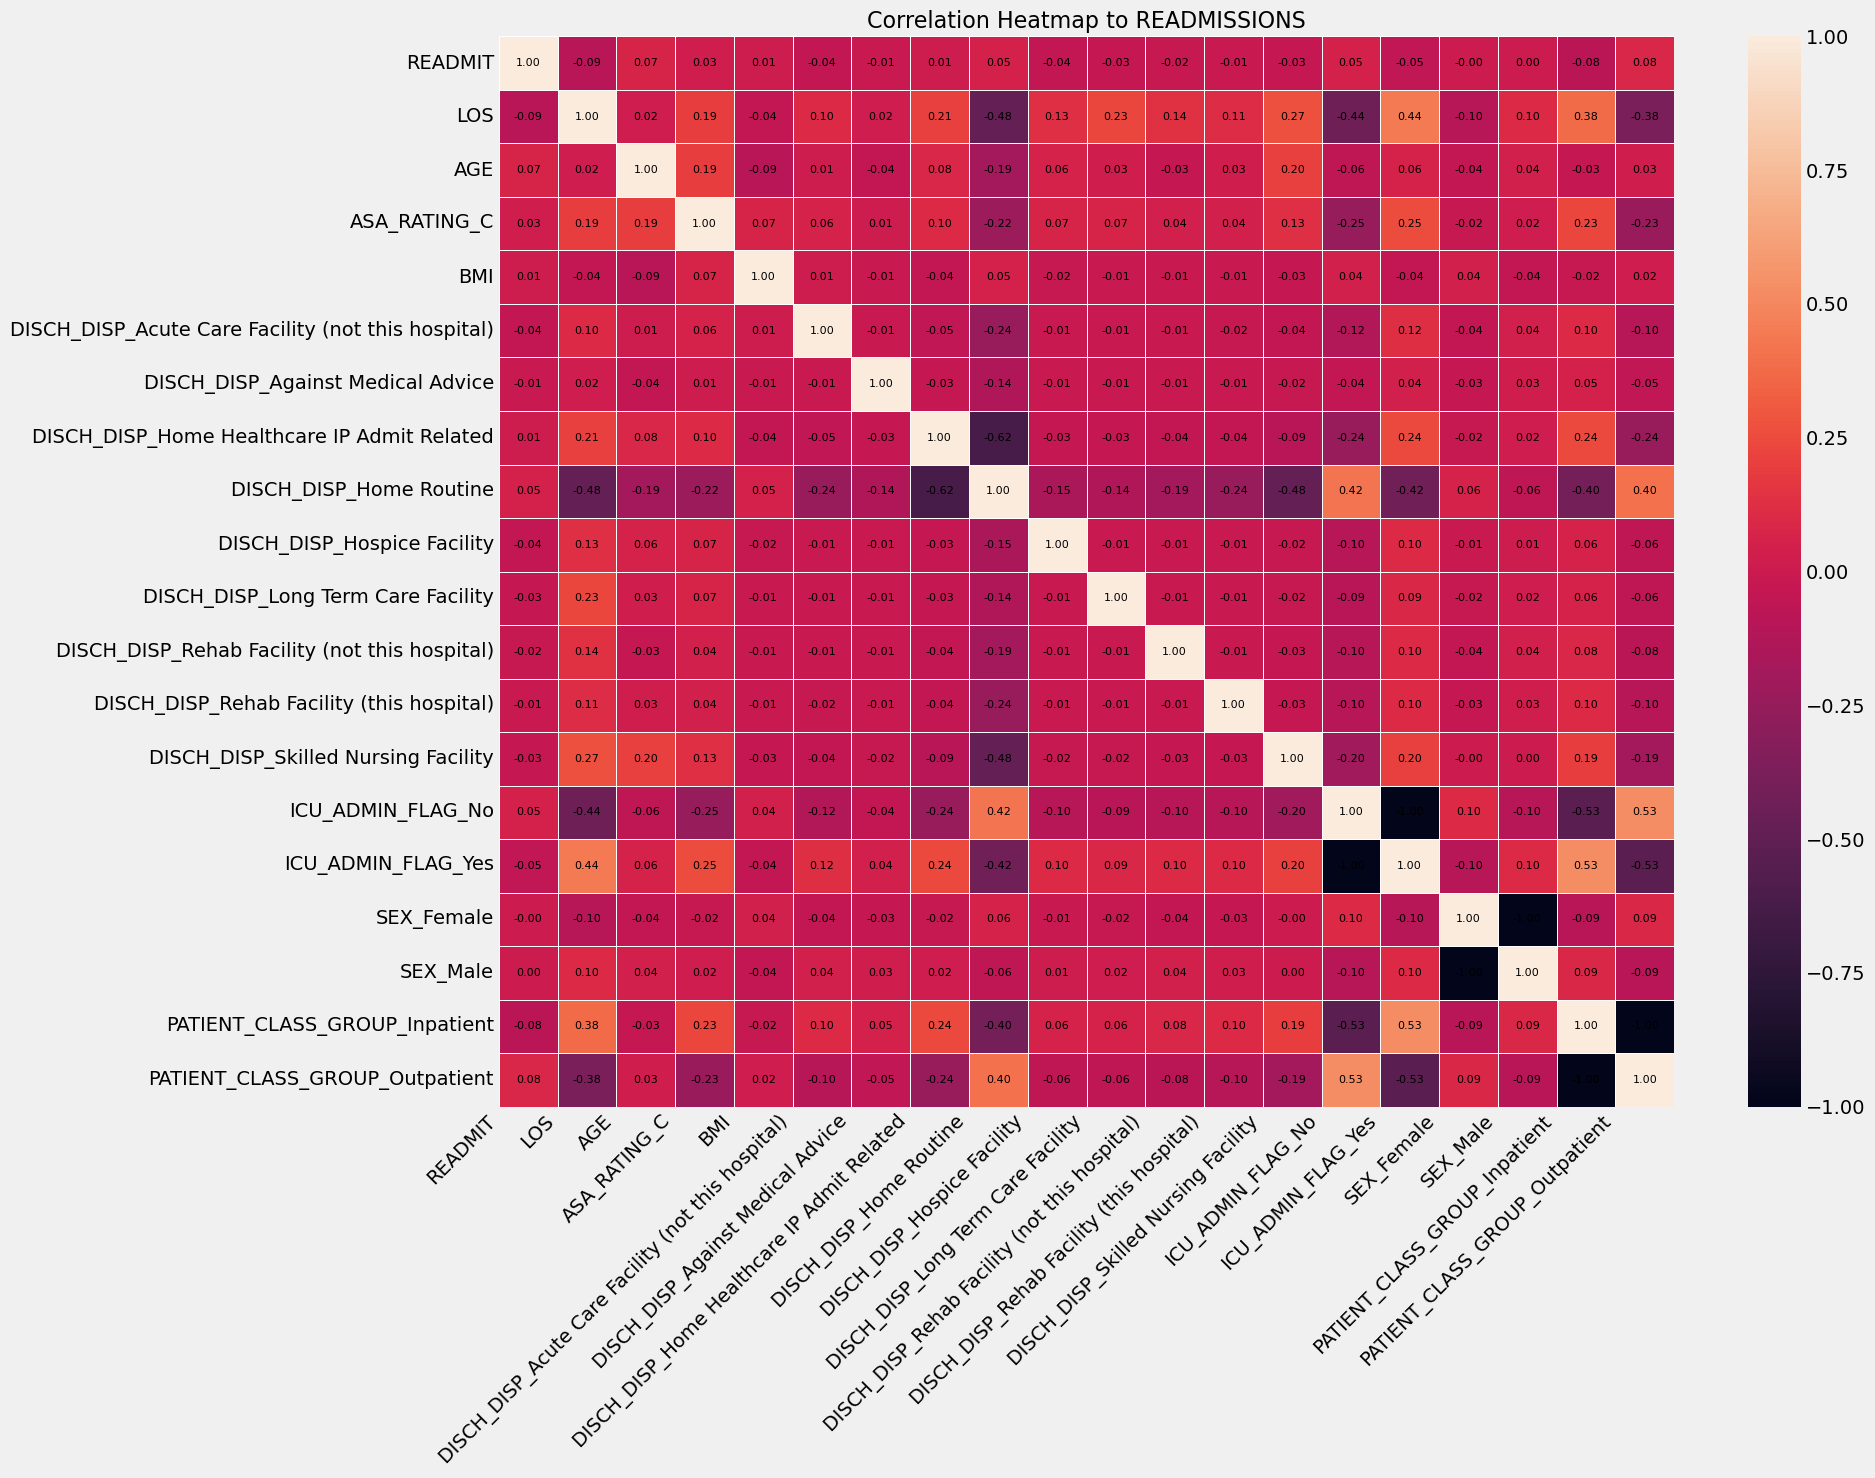

In [485]:
corr = corr.loc[['READMIT'] + [col for col in corr.index if col != 'READMIT'], 
                ['READMIT'] + [col for col in corr.columns if col != 'READMIT']]

plt.figure(figsize=(20, 15))
ax = sns.heatmap(corr, annot=False, fmt='.2f', linewidths=.5)

# Manually add annotations
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        text = ax.text(j + 0.5, i + 0.5, f'{corr.iloc[i, j]:.2f}',
                       ha='center', va='center', color='black', fontsize=8)

plt.xticks(ticks=np.arange(len(corr.columns)), labels=corr.columns, rotation=45, ha='right')

plt.title('Correlation Heatmap to READMISSIONS', fontsize=16)
plt.tight_layout()
plt.show()

### Process and Method: 
- Fit on train data
- Transform the test data
- Scale the data after running train/split
- Call the model




### Train/Test Split

With the data prepared, it is split it into a train and test set.

In [490]:
# Separating the target (y) and the features (X)
X = df_encoded.drop(columns=['READMIT'])  
y = df_encoded['READMIT']  

X.info()
y.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28628 entries, 0 to 65727
Data columns (total 19 columns):
 #   Column                                              Non-Null Count  Dtype
---  ------                                              --------------  -----
 0   LOS                                                 28628 non-null  int32
 1   AGE                                                 28628 non-null  int64
 2   ASA_RATING_C                                        28628 non-null  int64
 3   BMI                                                 28628 non-null  int32
 4   DISCH_DISP_Acute Care Facility (not this hospital)  28628 non-null  int32
 5   DISCH_DISP_Against Medical Advice                   28628 non-null  int32
 6   DISCH_DISP_Home Healthcare IP Admit Related         28628 non-null  int32
 7   DISCH_DISP_Home Routine                             28628 non-null  int32
 8   DISCH_DISP_Hospice Facility                         28628 non-null  int32
 9   DISCH_DISP_Long Term C

In [494]:
#Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Verifying the distribution of the target variable in the training and test sets
print("Training set class distribution:\n", y_train.value_counts(normalize=True))
print("Test set class distribution:\n", y_test.value_counts(normalize=True))

Training set class distribution:
 READMIT
0    0.844118
1    0.155882
Name: proportion, dtype: float64
Test set class distribution:
 READMIT
0    0.844045
1    0.155955
Name: proportion, dtype: float64


In [496]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22902 entries, 1110 to 63044
Data columns (total 19 columns):
 #   Column                                              Non-Null Count  Dtype
---  ------                                              --------------  -----
 0   LOS                                                 22902 non-null  int32
 1   AGE                                                 22902 non-null  int64
 2   ASA_RATING_C                                        22902 non-null  int64
 3   BMI                                                 22902 non-null  int32
 4   DISCH_DISP_Acute Care Facility (not this hospital)  22902 non-null  int32
 5   DISCH_DISP_Against Medical Advice                   22902 non-null  int32
 6   DISCH_DISP_Home Healthcare IP Admit Related         22902 non-null  int32
 7   DISCH_DISP_Home Routine                             22902 non-null  int32
 8   DISCH_DISP_Hospice Facility                         22902 non-null  int32
 9   DISCH_DISP_Long Ter

In [498]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(22902, 19)
(22902,)
(5726, 19)
(5726,)


In [500]:
#Identify the columns to scale (only numerical columns)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

In [504]:
# Convert the scaled arrays back to DataFrame
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

# Now X_train_scaled_df and X_test_scaled_df are DataFrames with the original column names and index

##### Explore the data to see if standardization is needed

Text(0.5, 0.98, 'Comparing features before scaling which shows the data needs to be scaled')

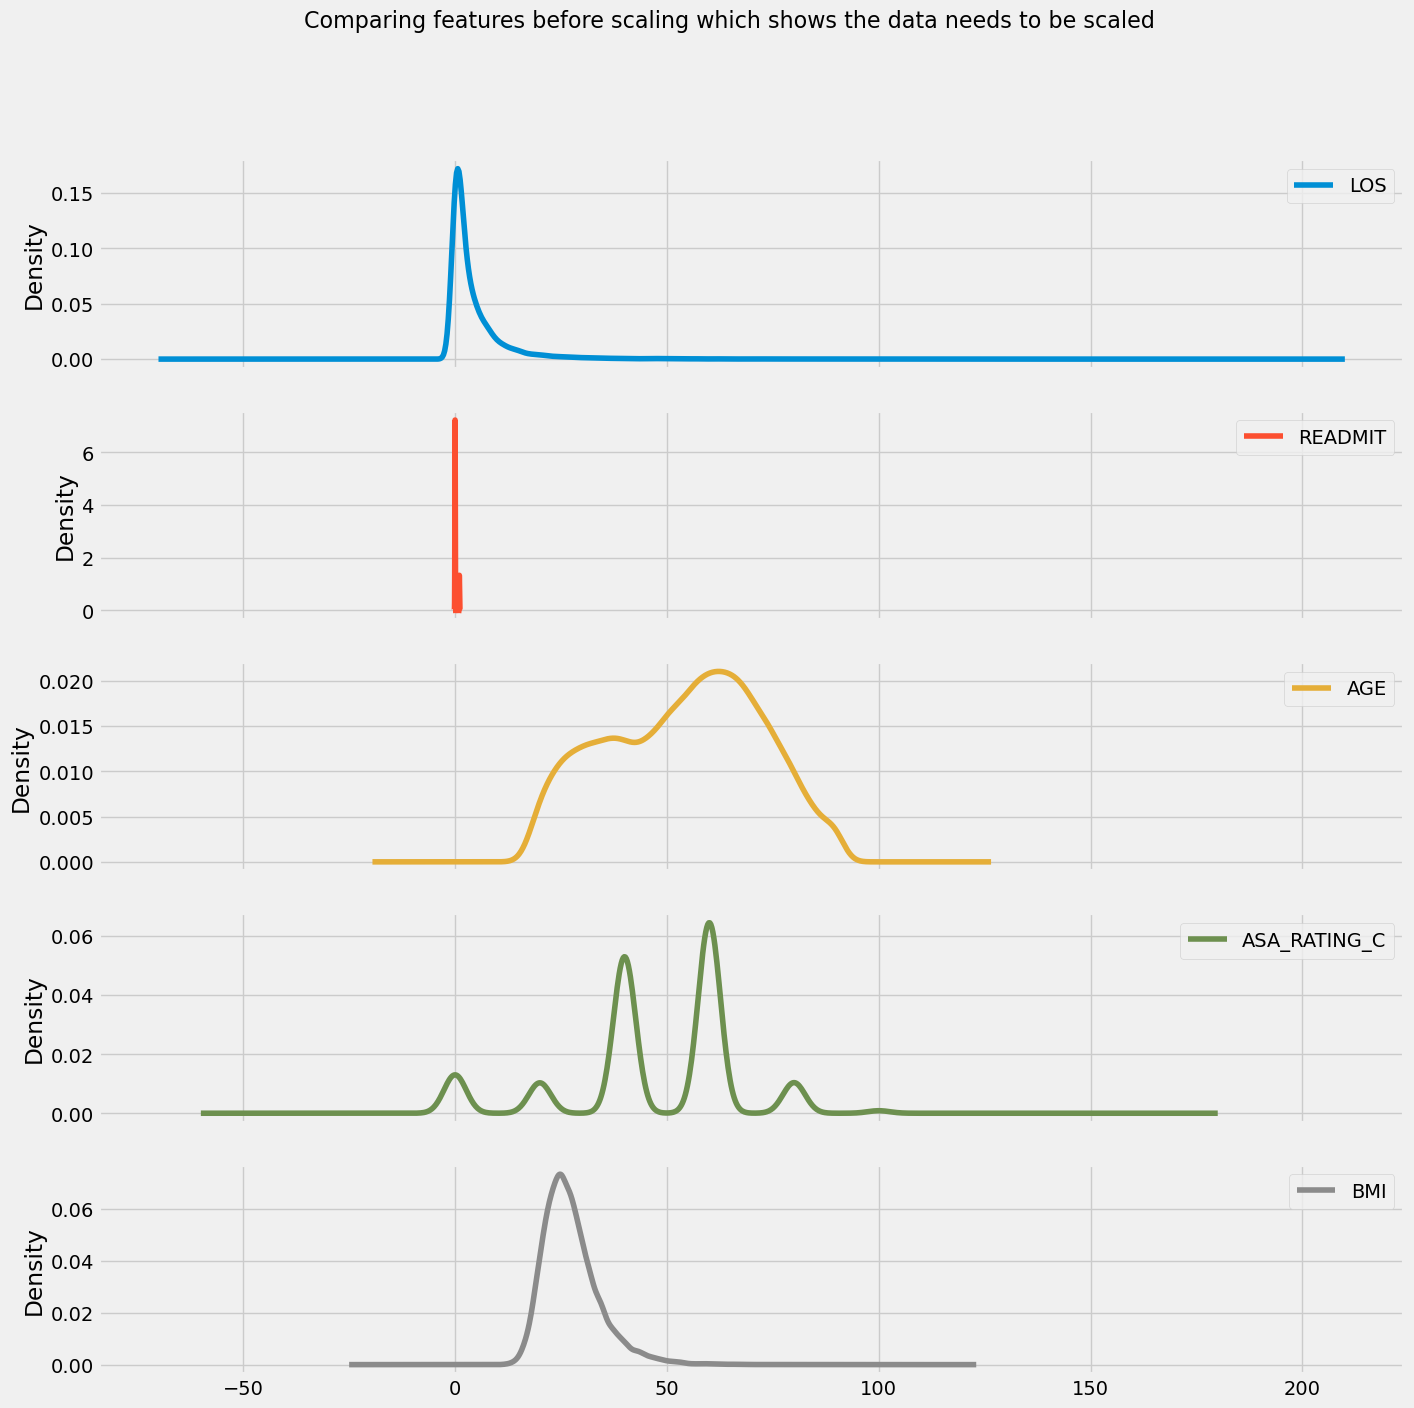

In [507]:
#Looking at features before scaling:

df.plot(kind = 'kde', figsize = (15, 15), subplots = True, title = "Comparing features before scaling which shows the data needs to be scaled");
plt.suptitle("Comparing features before scaling which shows the data needs to be scaled", fontsize=16)

In [508]:
X_train_scaled = df.select_dtypes(['int', 'float']).drop(columns = ['READMIT'])

Text(0.5, 0.98, 'Showing features after scaling which shows the data has been scaled')

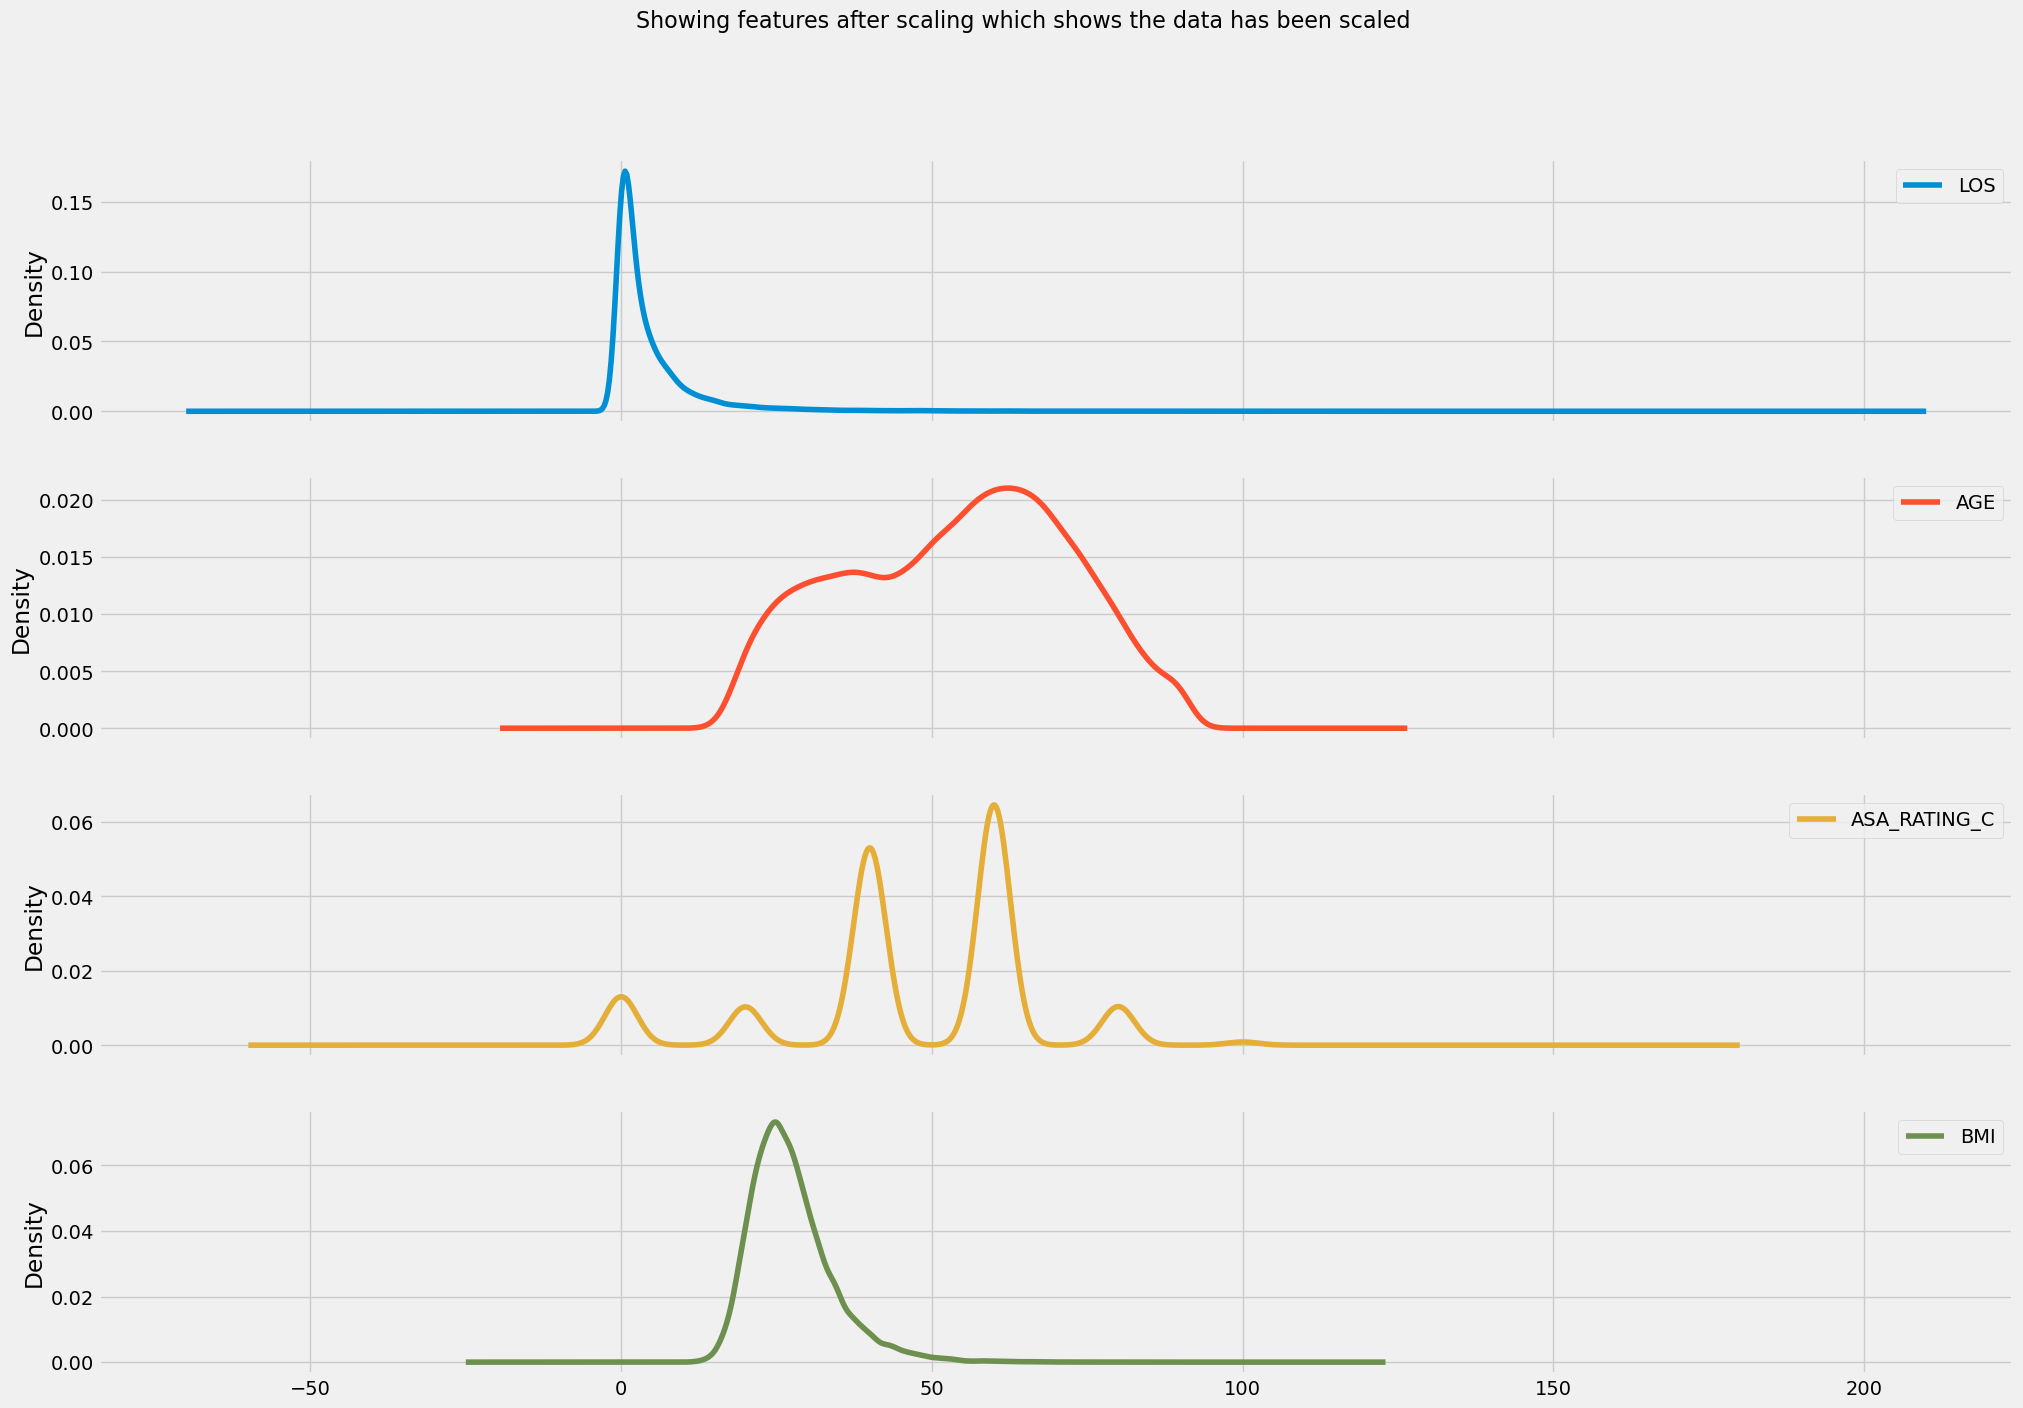

In [509]:
X_train_scaled.plot(kind = 'kde', subplots = True, figsize = (22, 15));
plt.suptitle("Showing features after scaling which shows the data has been scaled", fontsize=16)

#### Standardizing the Feature Values

In [164]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(22902, 19)
(22902,)
(5726, 19)
(5726,)


In [168]:
print(X_train_scaled_df.shape)
print(y_train.shape)

print(X_test_scaled_df.shape)
print(y_test.shape)

(22902, 19)
(22902,)
(5726, 19)
(5726,)


### Converting to a Pandas Dataframe from numpy array

In [170]:
# to verify data is successfully scaled: mean should be 0 and std should be 1. 
X_train_scaled_df.agg(['mean', 'std']).round(1)


,LOS,AGE,ASA_RATING_C,BMI,DISCH_DISP_Acute Care Facility (not this hospital),DISCH_DISP_Against Medical Advice,DISCH_DISP_Home Healthcare IP Admit Related,DISCH_DISP_Home Routine,DISCH_DISP_Hospice Facility,DISCH_DISP_Long Term Care Facility,DISCH_DISP_Rehab Facility (not this hospital),DISCH_DISP_Rehab Facility (this hospital),DISCH_DISP_Skilled Nursing Facility,ICU_ADMIN_FLAG_No,ICU_ADMIN_FLAG_Yes,SEX_Female,SEX_Male,PATIENT_CLASS_GROUP_Inpatient,PATIENT_CLASS_GROUP_Outpatient
mean,0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


#### The data has been successfully scaled. Data is ready for training a model

## Develop Baseline Models

#### Before building the first model, I will establish a baseline.  

In [176]:
dummy = DummyClassifier(strategy= "prior")

In [178]:
# fit the mdel 
dummy.fit(X_train, y_train)

# accuracy score
print("The accuracy of the dummy classifier for train is {:.2%}".format(dummy.score(X_train, y_train)))
print("The accuracy of the dummy classifier for test is {:.2%}".format(dummy.score(X_test, y_test)))

The accuracy of the dummy classifier for train is 84.41%
The accuracy of the dummy classifier for test is 84.40%


### Baseline Performance to Exceed:


| Dummy Classifier          | Accuracy                                   |
|---------------------------|--------------------------------------------|
| Train                     | 84.41%                                     |
| Test                      | 84.40%                                     |

In [181]:
np.sum([y_test == 1])

893

In [183]:
np.sum([y_test == 0])

4833

## Building Additional Models

### A Logistic Regression Model

Using Logistic Regression to build a basic model on the data.  

In [518]:
# calling the object
lg = LogisticRegression()

# fitting the model 
lg.fit(X_train_scaled_df,y_train)

# train score
print(f"The accuracy on the train data is : {lg.score(X_train_scaled_df, y_train):.4f}")



The accuracy on the train data is : 0.8441


### Logistic Regression Model Accuracy: 


| Logistic Regression         | Accuracy                                   |
|-----------------------------|--------------------------------------------|
| Train                       | 84.00%                                     |


In [521]:
def plot_classifier(X, y, model):
    h = .02  # step size in the mesh

    # Create color maps
    cmap_light = plt.cm.RdYlBu
    cmap_bold = ['#FF0000', '#0000FF']

    # We create an instance of Neighbours Classifier and fit the data.
    model.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolor='k', s=20)
    plt.title("Classification boundaries")
    plt.show()

### Logistic Regression Coefficients

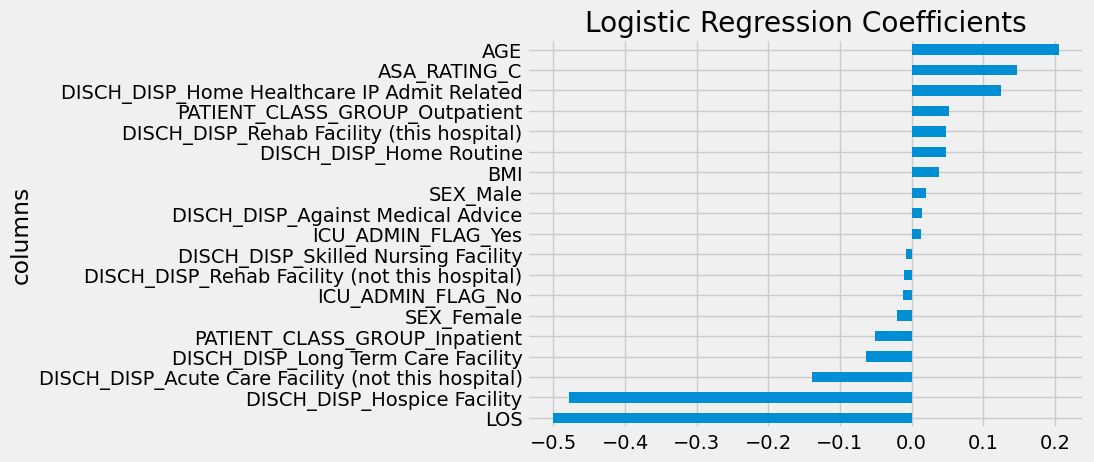

In [524]:
coefficients = lg.coef_[0] # the [0] is to extract the values in single array

# Generate labels for the coefficients
labels = X_train_scaled_df.columns.tolist()

# converting into df 
lr_results = pd.DataFrame({"columns": labels, "values" : coefficients}).sort_values(by = "values")
lr_results.plot(kind = 'barh', x = 'columns', y = 'values', legend = False);
plt.title('Logistic Regression Coefficients')

# Display the plot
plt.show()

### Interpretation

- The negative value means it decreases the odds of readmission. So being an Inpatient Admission has a strong effect on reducing the likelihood of readmission.
- The positive values means it increases the odds of readmission.  The ASA_RATING_C has a strong effect on increasing the likelihood of readmission.

### KNN  - can lend to overfitting and not good at generalization

In [548]:
#when using KNN need to use a standard scaler
# call the model 
knn = KNeighborsClassifier()

# fit the model 
knn.fit(X_train_scaled_df, y_train)

# train score
print(f"The accuracy on the train data is : {knn.score(X_train_scaled_df, y_train):.4f}")
print("The accuracy score of the test model is {:.4f}".format(knn.score(X_test_scaled_df, y_test)))

The accuracy on the train data is : 0.8564
The accuracy score of the test model is 0.8199


### KNN Model Accuracy: 


| KNN                         | Accuracy                                   |
|-----------------------------|--------------------------------------------|
| Train                       | 85.64%                                     |
| Test                        | 81.99%                                     |

In [555]:
from sklearn.metrics import precision_score

In [557]:
precision_score(y_train, train_predictions, average='macro')

0.7525380295963104

### Decision Trees model using DecisionTreeClassifier

In [560]:
from sklearn.tree import DecisionTreeClassifier

In [562]:
# call the model 
dt = DecisionTreeClassifier()

# fit the model 
dt.fit(X_train_scaled_df, y_train)

# train score
print(f"The accuracy on the train data is : {dt.score(X_train_scaled_df, y_train):.2f}")
print("The accuracy score of the model for test is {:.2f}".format(dt.score(X_test_scaled_df, y_test)))


The accuracy on the train data is : 0.97
The accuracy score of the model for test is 0.74



#### This is typical that the test score will be worse that the train due to overfitting, does not do well to generalize the data

### Decision Tree Model Accuracy: 


| Decision Tree               | Accuracy                                   |
|-----------------------------|--------------------------------------------|
| Train                       | 97.00%                                     |
| Test                        | 74.00%                                     |

### Random Forest Classifier

In [567]:
# call the model 
rf = RandomForestClassifier()

# fit the model
rf.fit(X_train_scaled_df, y_train)

# train score
print(f"The accuracy on the train data is : {rf.score(X_train_scaled_df, y_train):.2f}")
print("The accuracy score of the test model is {:.2f}".format(rf.score(X_test_scaled_df, y_test)))

The accuracy on the train data is : 0.97
The accuracy score of the test model is 0.80


### Random Forest Classifier Model Accuracy: 


| Random Forest Classifier    | Accuracy                                   |
|-----------------------------|--------------------------------------------|
| Train                       | 97.00%                                     |
| Test                        | 80.00%                                     |

#### Conducting hyper-parameter tuning to find the best tuning 
- random forest can be improved with hyperparameter tuning by deciding which columns are important.  
- Random forest may be able to capture linear regression relationships better that logistic regression. 


### SVM

In [573]:
# call the model (on unscaled data)
svc = SVC() #Default hyperparameters

# fit the model 
svc.fit(X_train_scaled_df,y_train)

# score the model 
print("The accuracy of the SVM for train is {:.2%}".format(svc.score(X_train_scaled_df, y_train)))
print("The accuracy of the SVM for test is {:.2%}".format(svc.score(X_test_scaled_df, y_test)))

The accuracy of the SVM for train is 84.41%
The accuracy of the SVM for test is 84.40%


SVM Model Accuracy: 


| SVM                         | Accuracy                                   |
|-----------------------------|--------------------------------------------|
| Train                       | 84.41%                                     |
| Test                        | 84.40%                                     |

### Tuning the model and applying GridSearch

* GridSearch is used to change: Kernels, C values, gamma values
* Polynomial kernels can also have change in the degree



In [578]:
kernel_range = ['linear', 'poly', 'rbf', 'sigmoid']
C_range = range(1, 10, 2)
degree_range = range(1, 5)
max_iter_range = [-1, 1, 2]

# putting it togther
grid = dict(kernel = kernel_range, C = C_range, degree = degree_range, max_iter = max_iter_range)

In [580]:
grid

{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
 'C': range(1, 10, 2),
 'degree': range(1, 5),
 'max_iter': [-1, 1, 2]}

In [582]:
# Models to compare
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'KNearestNeighbors': KNeighborsClassifier(),
    'SVC': SVC(),
    'DecisionTree': DecisionTreeClassifier(),
    'RandomForest' : RandomForestClassifier()
}

In [584]:
# Dictionary to store results
results = {}

In [586]:
# Train and evaluate each model
for name, model in models.items():
    start_time = time.time()
    model.fit(X_train_scaled_df, y_train)
    train_time = time.time() - start_time
    y_pred = model.predict(X_test_scaled_df)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    
    results[name] = {
        'train_time': train_time,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall
    }

In [589]:
# Printing results
for name, metrics in results.items():
    print(f"Model: {name}")
    print(f"Training Time: {metrics['train_time']:.4f} seconds")
    print(f"Accuracy: {metrics['accuracy']:.4f}")
    print(f"Precision: {metrics['precision']:.4f}")
    print(f"Recall: {metrics['recall']:.4f}")
    print("\n")

Model: LogisticRegression
Training Time: 0.0397 seconds
Accuracy: 0.8440
Precision: 0.4220
Recall: 0.5000


Model: KNearestNeighbors
Training Time: 0.0000 seconds
Accuracy: 0.8199
Precision: 0.5401
Recall: 0.5131


Model: SVC
Training Time: 20.5980 seconds
Accuracy: 0.8440
Precision: 0.4220
Recall: 0.5000


Model: DecisionTree
Training Time: 0.0730 seconds
Accuracy: 0.7454
Precision: 0.5173
Recall: 0.5173


Model: RandomForest
Training Time: 1.7902 seconds
Accuracy: 0.8048
Precision: 0.5326
Recall: 0.5160




### Model Performance and Model Comparisons

Logistic Regression model performance has been compared with the KNNm, Decision Tree, SVM, and RandomForest models using Training Time, Accuracy, Precision, and Recall scores.  

| Model              | Training Time (seconds) | Accuracy | Precision | Recall  |
|--------------------|-------------------------|----------|-----------|---------|
| LogisticRegression | 0.0365                  | 0.8440   | 0.4220    | 0.5000  |
| KNearestNeighbors  | 0.0046                  | 0.8199   | 0.5401    | 0.5131  |
| SVC                | 21.4163                 | 0.8440   | 0.4220    | 0.5000  |
| DecisionTree       | 0.0789                  | 0.7440   | 0.5172    | 0.5174  |
| RandomForest       | 1.8248                  | 0.8049   | 0.5313    | 0.5152  |



#### Improving the Model

Now that I have provided some basic models and results, next we can to try to improve these by considering the following:
- More feature engineering and exploration.  For example, should we keep the BMI feature? 
- Hyperparameter tuning and grid search.  All of the models used here have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjustments to the performance metric can also be further explored

### Hyperparameter Tuning

In [594]:
# Choose the model to optimize based on the desired metric (e.g., 'accuracy')
chosen_metric = 'accuracy'
best_model_name = max(results, key=lambda x: results[x][chosen_metric])
best_model = models[best_model_name]
print(best_model)

LogisticRegression(max_iter=1000)


In [596]:
# Hyperparameter tuning using GridSearchCV
param_grid = {}
if best_model_name == 'LogisticRegression':
    param_grid = {'C': [0.1, 1, 10, 100]}
elif best_model_name == 'KNearestNeighbors':
    param_grid = {'n_neighbors': [2, 3, 7, 9]}
elif best_model_name == 'SVC':
    param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']}

grid_search = GridSearchCV(best_model, param_grid, scoring=chosen_metric, cv=5)
grid_search.fit(X_train_scaled_df, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.1, 1, 10, 100]}, scoring='accuracy')

In [598]:
# Print best parameters and corresponding performance
print(f"Best Model: {best_model_name}")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best {chosen_metric.capitalize()}: {grid_search.best_score_:.4f}")

Best Model: LogisticRegression
Best Parameters: {'C': 0.1}
Best Accuracy: 0.8441


In [600]:
# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled_df)

print("\nFinal Model Evaluation on Test Set")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred, average='macro'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred, average='macro'):.4f}")


Final Model Evaluation on Test Set
Accuracy: 0.8440
Precision: 0.4220
Recall: 0.5000


In [602]:
# Convert the results dictionary to a DataFrame
df_results = pd.DataFrame.from_dict(results, orient='index')

# Display the DataFrame
print(df_results)

                    train_time  accuracy  precision    recall
LogisticRegression    0.039701  0.844045   0.422022  0.500000
KNearestNeighbors     0.000000  0.819944   0.540109  0.513110
SVC                  20.597999  0.844045   0.422022  0.500000
DecisionTree          0.073008  0.745372   0.517256  0.517319
RandomForest          1.790194  0.804750   0.532595  0.515978


## Findings and Recommendations

### Findings:
- Logistic Regression is Best: Among the models, Logistic Regression has the highest accuracy (0.8440) with minimal training time (0.0365 seconds).
- Low Recall Across Models: All models show low recall (around 0.500), indicating they miss about 50% of actual readmissions.
- Implications of Low Recall: The models may miss critical cases, risking inadequate intervention, and suggesting a need for model improvement or additional data.
- Potential for Model Improvement: Consider refining features, tuning parameters, or exploring other algorithms to better capture patient readmission patterns.


### Recommendations:
- Key Predictive Features: The Logistic Regression Model highlights that age, ASA rating, discharge to home healthcare, and discharge to acute care facility significantly impact readmission likelihood.
- Decision-Making Insights: Higher age, more critical procedures, and discharge to home healthcare increase readmission risk, while discharge to another acute care facility and longer hospital stays reduce it.
- Feature Grouping: Providers can group similar features (e.g., sex) to apply weights when assessing readmission risk; males are slightly more likely to be readmitted than females.
- Outpatient vs. Inpatient: Outpatients are more likely to be readmitted, suggesting that inpatient care may lower readmission rates.
- Practical Application: The model aids healthcare providers in identifying at-risk patients, enabling timely interventions to reduce readmissions.



